In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report 
import pickle 

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
#Pull in X, Y data
x = pd.read_csv('PreprocX.csv', header=None)

y = pd.read_csv('PreprocY.csv', header=None)
y.drop(0, axis=1, inplace=True)

x_mini = pd.read_csv('PreprocXmini.csv', header=None)

y_mini = pd.read_csv('PreprocYmini.csv', header=None)
y_mini.drop(0, axis=1, inplace=True)

In [3]:
#Check shapes
xshape = x.shape
yshape = y.shape
xmshape = x_mini.shape
ymshape = y_mini.shape
print('DF:    |  Shape:\nx      | {}\ny      | {}\nx_mini | {}\ny_mini | {}'.format(xshape,yshape,xmshape,ymshape))

DF:    |  Shape:
x      | (60448, 37)
y      | (60448, 1)
x_mini | (6045, 37)
y_mini | (6045, 1)


In [4]:
#Create 20% test, 80% train split for param analysis
from sklearn import model_selection

XM_train,XM_test,YM_train,YM_test = model_selection.train_test_split(x_mini,y_mini,
                                                                       test_size = 0.2,
                                                                       random_state = 42)

In [5]:
#Function for DT param analysis
def DT_Param_Search(x_train, y_train, x_test, y_test, depth_rng = range(1,11)):
    depth_score = {}
    print('             test score     |     train score    |    score diff')
    for depth in depth_rng:
        dt_model = DecisionTreeClassifier(max_depth = depth, 
                                          random_state = 42)
        dt_model.fit(x_train,y_train)
        test_score = dt_model.score(x_test,y_test)
        train_score = dt_model.score(x_train,y_train)
        score_dif = np.abs(test_score - train_score)
        depth_score[depth] = [test_score, train_score, score_dif]
        print('m_dep {}: {} | {} | {}'.format(depth,test_score,train_score,score_dif))
    depths = []
    dscores = []
    for key in depth_score.keys():
        depths.append(key)
        dscores.append(depth_score[key])

    plt.plot(depths,dscores)
    plt.xlabel('Max Depth')
    plt.ylabel('Model Score')
    plt.title('Max depth parameter analysis')
    plt.legend(['test score', 'train score', '|score diff|'])
    plt.grid(b=True)
    return(depth_score)

             test score     |     train score    |    score diff
m_dep 1: 0.6898263027295285 | 0.6761786600496278 | 0.013647642679900707
m_dep 2: 0.7154673283705542 | 0.7096774193548387 | 0.005789909015715411
m_dep 3: 0.8105872622001654 | 0.793424317617866 | 0.01716294458229939
m_dep 4: 0.8188585607940446 | 0.8167907361455748 | 0.0020678246484697738
m_dep 5: 0.847808105872622 | 0.8469809760132341 | 0.0008271298593879317
m_dep 6: 0.8726220016542597 | 0.8755169561621174 | 0.0028949545078577055
m_dep 7: 0.8858560794044665 | 0.9030190239867659 | 0.01716294458229939
m_dep 8: 0.9081885856079405 | 0.9311414392059554 | 0.02295285359801491
m_dep 9: 0.9214226633581473 | 0.9503722084367245 | 0.028949545078577277
m_dep 10: 0.9305210918114144 | 0.9623655913978495 | 0.03184449958643509
m_dep 11: 0.9379652605459057 | 0.9724979321753515 | 0.034532671629445844
m_dep 12: 0.9338296112489661 | 0.9745657568238213 | 0.040736145574855165
m_dep 13: 0.9371381306865177 | 0.9789081885856079 | 0.04177005789909016

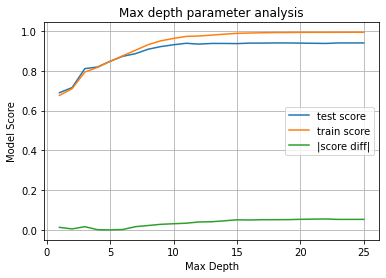

In [6]:
depth_scores = DT_Param_Search(x_train = XM_train, y_train = YM_train,
                               x_test = XM_test, y_test = YM_test,
                               depth_rng = range(1,26))

In [7]:
# DT sensitivity analysis
def DT_Sensitivity(x,y,max_depth):
    sen_x = []
    sen_y = []
    
    for test_ratio in range(10,100,5):
        X_train,X_test,y_train,y_test = model_selection.train_test_split(x, y,
                                                        test_size=test_ratio/100, 
                                                        random_state=42)
        dt_model = DecisionTreeClassifier(max_depth = max_depth,
                                          random_state = 42)
        dt_model.fit(X_train,y_train)
        sen_x.append(test_ratio)
        sen_y.append(dt_model.score(X_test,y_test))
        print('{}% test | score: {}'.format(test_ratio,sen_y[-1]))
    plt.plot(sen_x,sen_y)
    plt.xlabel('Test %')
    plt.ylabel('Model Score')
    plt.title('Sensitivity Analysis\n(max depth: {})'.format(max_depth))

10% test | score: 0.9537190082644628
15% test | score: 0.9470782800441014
20% test | score: 0.9371381306865177
25% test | score: 0.9384920634920635
30% test | score: 0.9316427783902976
35% test | score: 0.9310018903591682
40% test | score: 0.923490488006617
45% test | score: 0.9198823961778758
50% test | score: 0.9245782335428382
55% test | score: 0.9160902255639097
60% test | score: 0.9137027846705266
65% test | score: 0.9061068702290076
70% test | score: 0.9080812854442344
75% test | score: 0.8954565505072783
80% test | score: 0.8930934656741109
85% test | score: 0.8742946098462736
90% test | score: 0.856643999264841
95% test | score: 0.8425909803238726


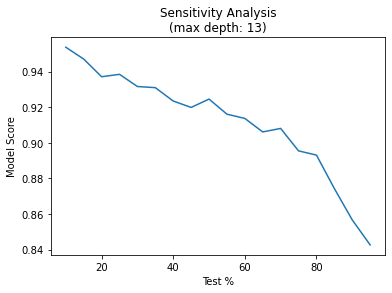

In [8]:
#Set params
max_depth = 13

#Do sensitivity analysis
DT_Sensitivity(x=x_mini, y=y_mini, max_depth=max_depth)

In [9]:
#Train models
#Set params
max_depth = 13
test_ratio = 0.2

######################################################################
########################## Mini Model ################################
######################################################################
#Split data
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x_mini, y_mini,
                                                                 test_size = test_ratio,
                                                                 random_state = 42)

#Fit model
dt_model_mini = DecisionTreeClassifier(max_depth = max_depth,
                                  random_state = 42)
dt_model_mini.fit(X_train, Y_train)

######################################################################
########################## Full Model ################################
######################################################################
#Split data
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x, y,
                                                                 test_size = test_ratio,
                                                                 random_state = 42)

#Fit model
dt_model_full = DecisionTreeClassifier(max_depth = max_depth,
                                  random_state = 42)
dt_model_full.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [10]:
#Compare full and mini models on full test set
#Score models
full_score = dt_model_full.score(X_test, Y_test)
mini_score = dt_model_mini.score(X_test, Y_test)

print('full model score: {}\nmini model score: {}'.format(full_score, mini_score))

full model score: 0.9671629445822995
mini model score: 0.8939619520264681


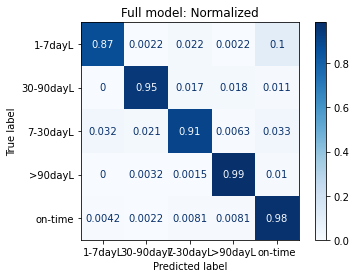

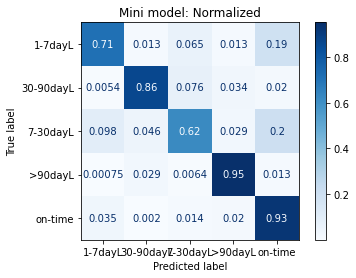

In [11]:
#Plot confusion matricies
#Full
full_confusion = plot_confusion_matrix(dt_model_full, X_test, Y_test,
                      normalize='true', cmap = plt.cm.Blues)
full_confusion.ax_.set_title('Full model: Normalized')
plt.show()

#Mini
mini_confusion = plot_confusion_matrix(dt_model_mini, X_test, Y_test,
                      normalize='true', cmap = plt.cm.Blues)
mini_confusion.ax_.set_title('Mini model: Normalized')
plt.show()

In [14]:
# #pickle models for later prediction
# models = [dt_model_full, dt_model_mini]
# names = ['DT_full', 'DT_mini']

# for i in range(len(models)):
#     with open(names[i] + '.pickle', 'wb') as f:
#         pickle.dump(models[i], f)